In [23]:
%pylab inline
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


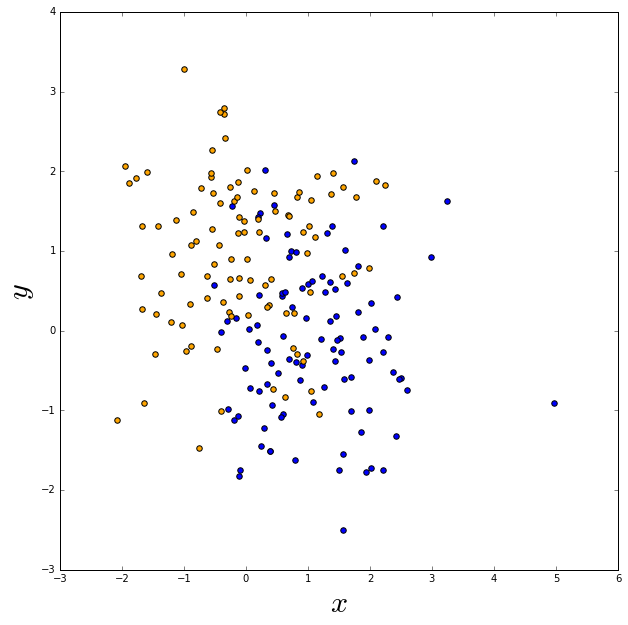

In [12]:
#azules
x1=[]
y1=[]
#rojas
x2=[]
y2=[]

N= 100
#creando los arreglos
for i in range(N):
    x1.append(normal(1,1))
    y1.append(normal(0,1))
    x2.append(normal(0,1))
    y2.append(normal(1,1))
    



scatter(x1,y1,c='b',s=30)
scatter(x2,y2,c='orange',s=30)
ylabel("$ y\ $",size=30)
xlabel("$ x\ $",size=30)


In [19]:
#separamos los datos en test y respuesta

X = zeros([2*N,2])
y = zeros([2*N])

for i in range(N):
    X[2*i,0] = x1[i]
    X[2*i,1] = y1[i]
    y[2*i] = 1
    X[2*i+1,0] = x2[i]
    X[2*i+1,1] = y2[i]
    y[2*i+1] = 0

#creando modelo de regresion lineal del paquete scikit
linreg = LinearRegression()

#aqui se crea un modelo lineal que da los coeficientes usados apra predecir la respuesta

linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

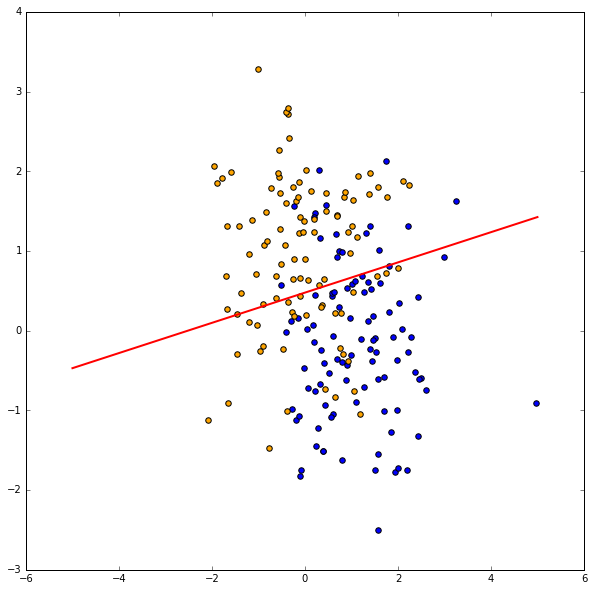

In [20]:
a=linspace(-5,5,1000)
b=a*linreg.coef_[0]+linreg.intercept_

plot(a,b,c="r",linewidth=2)
#plot(c,a,c="green",linewidth=2)
scatter(x1,y1,c='b',s=30)
scatter(x2,y2,c='orange',s=30)


In [21]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

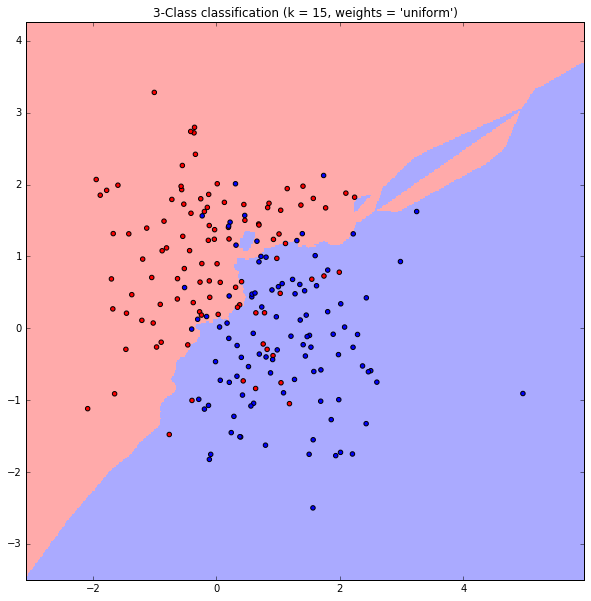

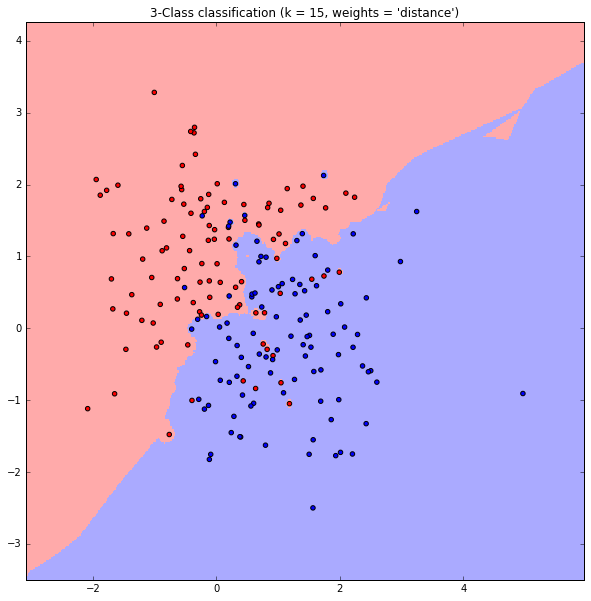

In [22]:
n_neighbors =15
h=0.02
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()